In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# 读取数据

In [3]:
df = pd.read_csv('data/medicine_data_ex.csv')
print(df)
print(type(df))

     category                                             title   price  \
0        补肾壮阳               汇仁 肾宝片 126片 调和阴阳温阳补肾扶正固本 男女同补补肾中成药品   322.0   
1        补肾壮阳               汇仁 肾宝片 126片 肾虚肾亏补肾中药肾气丸滋阴壮阳 推荐2盒1疗程   322.0   
2       风湿骨外伤          白云山 陈李济 舒筋健腰丸45g*10瓶 补益肝肾 强健筋骨 驱风除湿 活络止痛   890.0   
3        补肾壮阳           同仁堂 六味地黄丸（浓缩丸）300丸 （男女肾虚肾亏中药品滋阴补肾）六味地黄丸    49.5   
4        补肾壮阳               汇仁 肾宝片礼盒装 126片*4盒礼盒装温阳补肾肾虚肾亏京东自营旗舰店  1188.0   
...       ...                                               ...     ...   
2875    耳鼻喉用药               逸舒 氯雷他定片6片 用于过敏性鼻炎 慢性荨麻疹 瘙痒性和过敏性皮肤病     3.9   
2876    耳鼻喉用药              仙特明 盐酸西替利嗪片10mg*5片/盒（季节性鼻炎,常年性过敏性鼻炎）    18.8   
2877    耳鼻喉用药                  希臣 铁笛片1g*24片 生津止渴 咽干口燥 声音嘶哑 咽喉肿痛    25.8   
2878    耳鼻喉用药                                  济民可信 金果饮15ml*10支    29.8   
2879    耳鼻喉用药  王屋山 复方冬凌草含片 每片重0.6克 疏风清热.解毒利咽.用于咽部干燥.灼热.疼痛症状的改善.    22.0   

        nums                                 name     brand symptoms      type  
0     400000      

# 数据清洗，过滤销量为0的商品


In [5]:
df_obj = df[df['nums']>0]
print(df_obj)

     category                                             title   price  \
0        补肾壮阳               汇仁 肾宝片 126片 调和阴阳温阳补肾扶正固本 男女同补补肾中成药品   322.0   
1        补肾壮阳               汇仁 肾宝片 126片 肾虚肾亏补肾中药肾气丸滋阴壮阳 推荐2盒1疗程   322.0   
2       风湿骨外伤          白云山 陈李济 舒筋健腰丸45g*10瓶 补益肝肾 强健筋骨 驱风除湿 活络止痛   890.0   
3        补肾壮阳           同仁堂 六味地黄丸（浓缩丸）300丸 （男女肾虚肾亏中药品滋阴补肾）六味地黄丸    49.5   
4        补肾壮阳               汇仁 肾宝片礼盒装 126片*4盒礼盒装温阳补肾肾虚肾亏京东自营旗舰店  1188.0   
...       ...                                               ...     ...   
2875    耳鼻喉用药               逸舒 氯雷他定片6片 用于过敏性鼻炎 慢性荨麻疹 瘙痒性和过敏性皮肤病     3.9   
2876    耳鼻喉用药              仙特明 盐酸西替利嗪片10mg*5片/盒（季节性鼻炎,常年性过敏性鼻炎）    18.8   
2877    耳鼻喉用药                  希臣 铁笛片1g*24片 生津止渴 咽干口燥 声音嘶哑 咽喉肿痛    25.8   
2878    耳鼻喉用药                                  济民可信 金果饮15ml*10支    29.8   
2879    耳鼻喉用药  王屋山 复方冬凌草含片 每片重0.6克 疏风清热.解毒利咽.用于咽部干燥.灼热.疼痛症状的改善.    22.0   

        nums                                 name     brand symptoms      type  
0     400000      

# 数据分析

## 统计不同类别药品的数量

In [6]:
ser_size = df_obj.groupby('category').size()
print(ser_size)

category
儿科用药     269
妇科用药     190
心脑血管      10
感冒咳嗽     301
止痛镇痛      42
皮肤用药     425
维矿物质     236
耳鼻喉用药    187
肠胃消化     406
补气养血     260
补肾壮阳     309
风湿骨外伤    242
dtype: int64


## 绘制饼状图

<Figure size 1152x648 with 0 Axes>

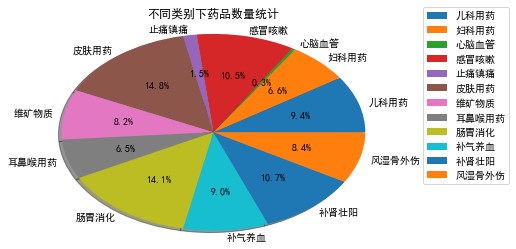

In [16]:
plt.figure(figsize=(16,9))
mpl.rcParams['font.sans-serif']=['SimHei'] # 避免中文乱码
fig,ax = plt.subplots(1)
ax.set_title('不同类别下药品数量统计') # 设置标题
ax.pie(ser_size,labels=ser_size.index,autopct='%3.1f%%',labeldistance=1.07,shadow=True,radius=1)

plt.legend(loc=1,bbox_to_anchor=(1.4,1.1)) # 显示图例
plt.axis('tight') # 显示为椭圆
plt.savefig('images/img_1.jpg')

plt.show()

### 统计不同类别药品最高价格和最低价格

In [17]:
ser_max_price = df_obj.groupby('category').max()['price']
ser_min_price = df_obj.groupby('category').min()['price']
print(ser_max_price)
print(ser_min_price)

category
儿科用药      298.0
妇科用药      387.0
心脑血管      790.0
感冒咳嗽      298.0
止痛镇痛       30.2
皮肤用药      398.0
维矿物质      285.0
耳鼻喉用药      75.0
肠胃消化      327.0
补气养血     2198.0
补肾壮阳     1380.0
风湿骨外伤    1290.0
Name: price, dtype: float64
category
儿科用药       9.9
妇科用药       7.9
心脑血管     585.0
感冒咳嗽       9.6
止痛镇痛       8.9
皮肤用药      10.0
维矿物质       5.8
耳鼻喉用药      3.9
肠胃消化       9.9
补气养血      18.0
补肾壮阳      12.8
风湿骨外伤      5.0
Name: price, dtype: float64


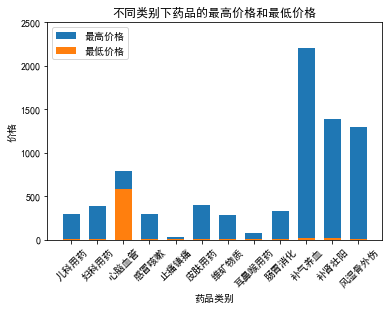

In [49]:
fig,ax = plt.subplots(1)
# 横坐标数组
x = np.arange(len(ser_max_price))
# 柱形宽度
width = 0.65
ax.bar(x,ser_max_price,width,label='最高价格')
ax.bar(x,ser_min_price,width,label='最低价格')
# plt.savefig('images/img_1.jpg')
ax.set_title('不同类别下药品的最高价格和最低价格')
ax.set_xlabel('药品类别')
ax.set_ylabel('价格')
# 设置显示刻度的位置(x轴)
ax.set_xticks(x)
ax.set_yticks(np.arange(0,3000,500))

# 指定刻度显示内容
ax.set_xticklabels(ser_max_price.index,rotation=45)

# 显示图例
ax.legend(loc='best')
plt.savefig('images/img_2.jpg')
plt.show()

### 不同类别药品价格分布

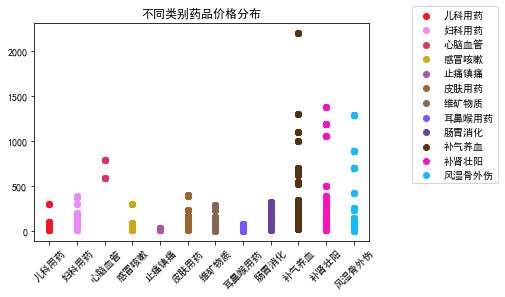

In [50]:
# 按照类别对价格进行分组

df_group = df_obj.groupby('category')['price']


colors = ['#ff1122','#ee88ff','#dd3366','#ccaa11','#aa55aa',
         '#996633','#886655','#7755ff','#664499','#553311',
         '#ff11bb','#11bbff']

labels =list(ser_max_price.index)
# print(labels)
fig,ax = plt.subplots(1)
ax.set_title('不同类别药品价格分布')
i = 0
for name,value in df_group:
    label = labels[i]
    color = colors[i]
    # value是元组
    x = np.ones(len(value))*(i+1)
    ax.scatter(x,value,color=color,label=label,marker='o')
    i +=1
# 设置刻度显示位置
ax.set_xticks(np.arange(1,len(labels)+1))
# 设置刻度标签
ax.set_xticklabels(labels,rotation=45)
# 设置图例位置


plt.legend(loc=1,bbox_to_anchor=(1.4,1.1)) # 显示图例

plt.savefig('images/img_3.jpg')
plt.show()





### 统计不同类别价格分布区间

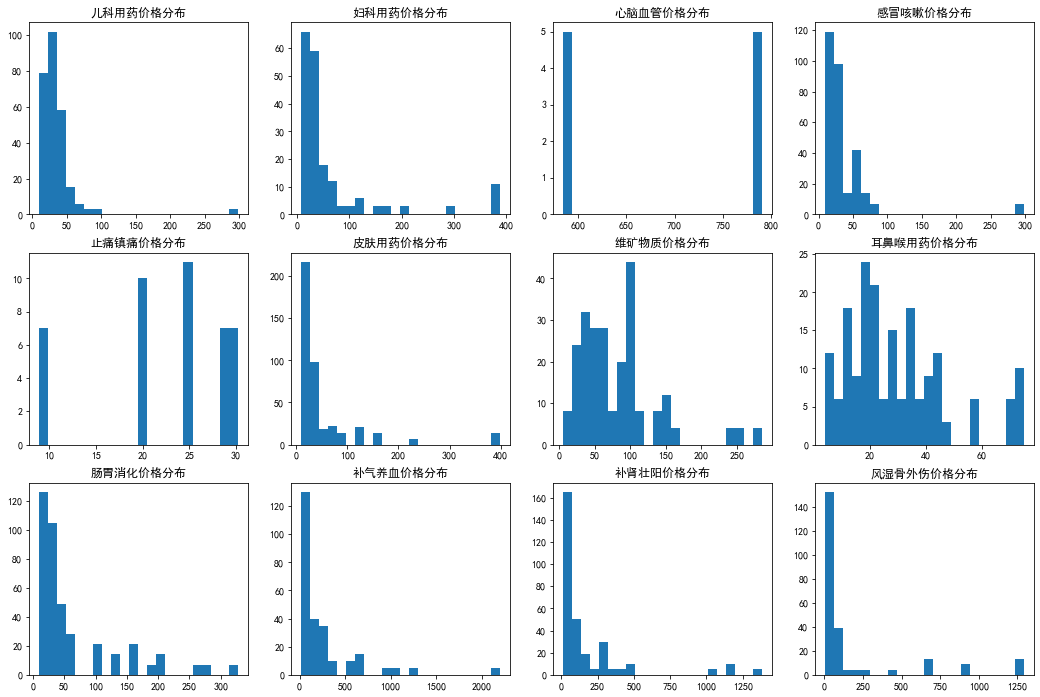

In [53]:
fig,subpolt_arr = plt.subplots(3,4,figsize=(18,12))
grouped = df_obj.groupby('category')
c = 0
for name,value in grouped:
    i = c//4
    j=c%4
    subpolt_arr[i,j].set_title(name+'价格分布')
    subpolt_arr[i,j].hist(df_obj[df_obj['category']==name]['price'],bins=22)
    c +=1

plt.savefig('images/img_4.jpg')
plt.show()


### 查看每个类别中销量最佳的作品

In [55]:
ser_max_nums = df_obj.groupby('category').max()
print(ser_max_nums[['name','nums']])

                      name    nums
category                          
儿科用药              龙牡龙牡壮骨颗粒  510000
妇科用药                金鸡金鸡胶囊  190000
心脑血管               天草丹参保心茶   51000
感冒咳嗽          香雪橘红痰咳液（无糖型）  850000
止痛镇痛                芬必得24粒  170000
皮肤用药             采乐2%*50ml  320000
维矿物质      钙尔奇碳酸钙维D3元素片100片  650000
耳鼻喉用药        雷诺考特32ug*120喷  250000
肠胃消化              马应龙麝香痔疮膏  620000
补气养血       青春宝抗衰老片80片*6瓶简装  280000
补肾壮阳        阿房宫虫草双参酒 500ml  840000
风湿骨外伤             颈复康颈复康颗粒  150000


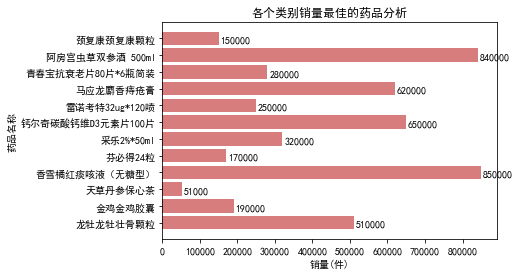

In [62]:
### 水平柱形图展示
fig,ax = plt.subplots(1)
ax.set_title('各个类别销量最佳的药品分析')
bar_height = 0.6
y = list(ser_max_nums['name'])
ax.barh(y=np.arange(len(y)),width=ser_max_nums['nums'],color='indianred',alpha=0.8)
# 在柱形图上显示具体数值，
for ypos,x in enumerate(ser_max_nums['nums']):
    ax.text(x+5000,ypos-bar_height/2,'%s'%x,ha='left',va='bottom')

ax.set_xlabel('销量(件)')
ax.set_ylabel('药品名称')
# 设置刻度显示位置
ax.set_yticks(np.arange(len(y)))
# 设置刻度标签
ax.set_yticklabels(y)
# 设置图例位置
plt.savefig('images/img_5.jpg')


plt.show()

### 分析各个类别销售额最佳的药品

In [66]:
df_obj['amount'] = df_obj['price']* df_obj['nums']

print(df_obj['amount'])
print(df_obj.iloc[1,:])

0       128800000.0
1       128800000.0
2        50730000.0
3        41580000.0
4        38016000.0
           ...     
2875        17550.0
2876       161680.0
2877        61920.0
2878        17880.0
2879        35200.0
Name: amount, Length: 2877, dtype: float64
category                                   补肾壮阳
title       汇仁 肾宝片 126片 肾虚肾亏补肾中药肾气丸滋阴壮阳 推荐2盒1疗程
price                                       322
nums                                     400000
name                                汇仁0.7g*126片
brand                                        汇仁
symptoms                                   畏寒怕冷
type                                   肾阳虚，阴阳亏虚
amount                                1.288e+08
Name: 1, dtype: object


f:\linux\python\myvenv\env1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_max_amount = df_obj.groupby('category').max()
# print(df_max_amount)
print(df_max_amount['name'],df_max_amount['amount'])


category
儿科用药      34680000.0
妇科用药      27099800.0
心脑血管      40290000.0
感冒咳嗽      22720000.0
止痛镇痛       5134000.0
皮肤用药      33540000.0
维矿物质     185250000.0
耳鼻喉用药     18750000.0
肠胃消化     104640000.0
补气养血     615440000.0
补肾壮阳     155480000.0
风湿骨外伤     50730000.0
Name: amount, dtype: float64


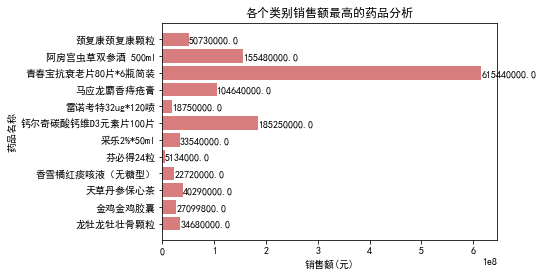

In [74]:
fig,ax = plt.subplots(1)
ax.set_title('各个类别销售额最高的药品分析')
bar_height = 0.6
y = list(df_max_amount['name'])
ax.barh(y=np.arange(len(y)),width=df_max_amount['amount'],color='indianred',alpha=0.8)
# 在柱形图上显示具体数值，
for ypos,x in enumerate(df_max_amount['amount']):
    ax.text(x+5000,ypos-bar_height/2,'%s'%x,ha='left',va='bottom')

ax.set_xlabel('销售额(元)')
ax.set_ylabel('药品名称')
# 设置刻度显示位置
ax.set_yticks(np.arange(len(y)))
# 设置刻度标签
ax.set_yticklabels(y)
# 设置图例位置
plt.savefig('images/img_6.jpg')


plt.show()

### 不同类别药品销售额分析

In [75]:
ser_amount= df_obj.groupby('category')['amount'].sum()
print(ser_amount)

category
儿科用药     7.717087e+08
妇科用药     4.884206e+08
心脑血管     2.541000e+08
感冒咳嗽     1.888677e+09
止痛镇痛     1.051134e+08
皮肤用药     1.977697e+09
维矿物质     6.195001e+09
耳鼻喉用药    3.511291e+08
肠胃消化     3.883154e+09
补气养血     9.227458e+09
补肾壮阳     5.234041e+09
风湿骨外伤    1.327018e+09
Name: amount, dtype: float64


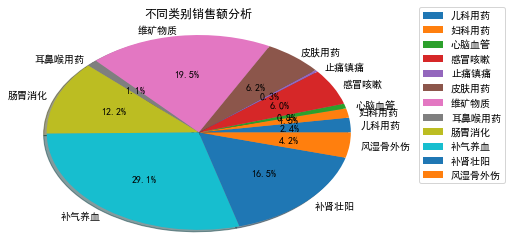

In [83]:
fig,ax = plt.subplots(1)
ax.set_title('不同类别销售额分析')
ax.pie(ser_amount,labels=ser_amount.index,autopct='%3.1f%%',labeldistance=1.07,shadow=True,radius=1)

plt.legend(loc=1,bbox_to_anchor=(1.43,1.1))

plt.axis('tight')
plt.savefig('images/img_7.jpg')
plt.show()

### 根据品牌对药品销售额进行分析

In [84]:
df_amount_by_brand = df_obj.groupby('brand').sum()
print(df_amount_by_brand)


         price      nums       amount
brand                                
21金维他  1747.20   5600000  489216000.0
999    3086.65  39933000  834938500.0
BMI     700.00      4200     420000.0
MOL     108.00     24300     874800.0
丁桂      681.00   2040000  115770000.0
...        ...       ...          ...
青春宝    1740.00     20000    6960000.0
颈复康     291.20    208000    7571200.0
香雪      924.00   1680000   73920000.0
马应龙     726.60  21700000  450492000.0
龙牡      609.00    554200   25002600.0

[223 rows x 3 columns]


In [86]:
# 排序降序
df_amount_by_brand = df_amount_by_brand.sort_values(by='amount',ascending=False)
df_amount_by_brand = df_amount_by_brand[df_amount_by_brand['amount']>100000000]
print(df_amount_by_brand)

                       price      nums        amount
brand                                               
东阿阿胶                31250.00  11249500  7.111936e+09
同仁堂（TRT）            23277.50  47815100  2.302364e+09
汇仁                  25014.70   8999500  2.137433e+09
爱乐维（Menevit）         3648.00  10408400  1.961727e+09
迪巧                   2829.20  15400000  1.556060e+09
舒尔佳                  4532.50   8960000  1.450400e+09
钙尔奇（Caltrate）        2388.00  15120000  1.289520e+09
九芝堂                 10700.10  13484000  1.207311e+09
999                  3086.65  39933000  8.349385e+08
盘龙云海                 3402.00   4410000  7.144200e+08
敖东                   2665.00   5250000  5.596500e+08
21金维他                1747.20   5600000  4.892160e+08
慢严舒柠（MINT）           1917.30   8750000  4.793250e+08
蔓迪                   1778.00   3640000  4.622800e+08
陈李济                  8279.00    667400  4.612660e+08
马应龙                   726.60  21700000  4.504920e+08
福胶                   9530.00    675000  4.2885

(41, 3)


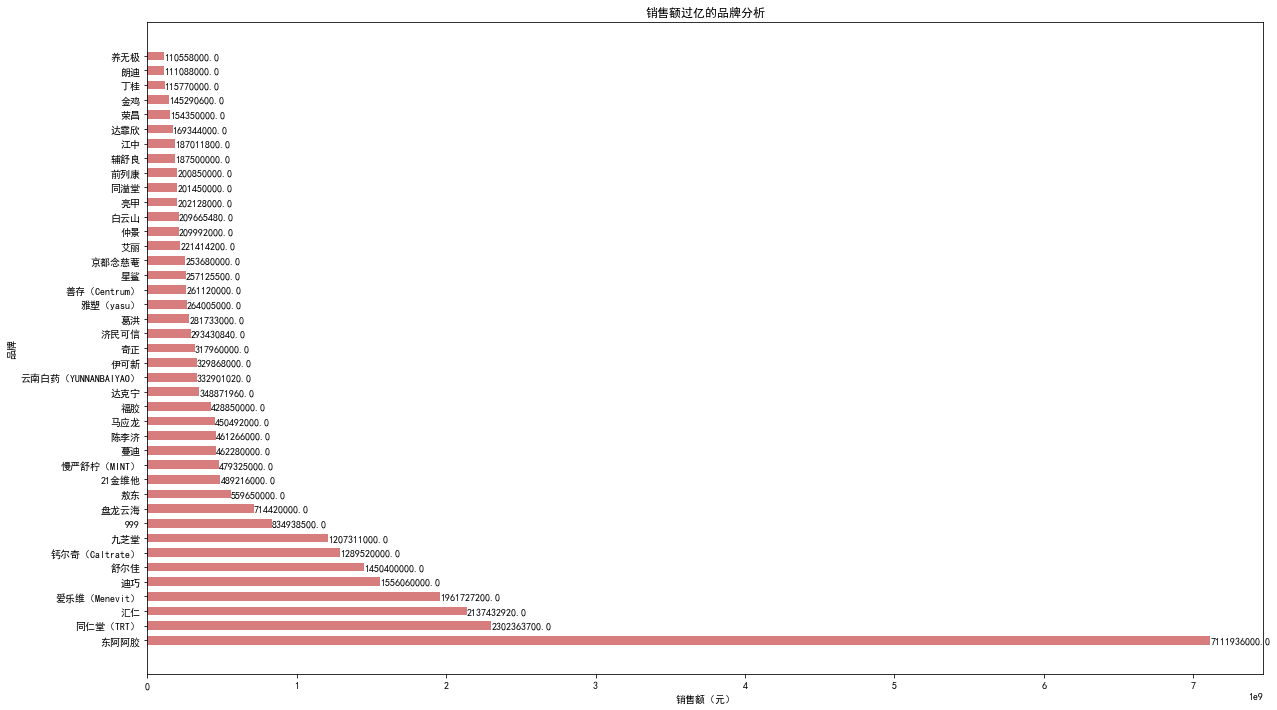

In [91]:
print(df_amount_by_brand.shape)
fig,ax = plt.subplots(1,figsize=(20,12))
ax.set_title('销售额过亿的品牌分析')
bar_height = 0.6
y = list(df_amount_by_brand.index)
ax.barh(y=np.arange(len(y)),width=df_amount_by_brand['amount'],height=bar_height,color='indianred',alpha=0.8)

for ypos,x in enumerate(df_amount_by_brand['amount']):
    ax.text(x+5000,ypos-bar_height/2,'%s'%x,ha='left',va='bottom')

ax.set_xlabel('销售额（元）')
ax.set_ylabel('品牌')
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y)
plt.savefig('./images/img_8.jpg')
plt.show()